## **"Build A Better Grinnell" Code Template for Individual Questions**

> This file includes the **code template** for Individual Questions analysis 
1. Words Cloud
2. Top 10 words
3. Word before and after
4. Sentimental Analysis (Individual Question Level)

# **Setting UP**


> This chunck includes all the necessary packages and dataset that ***have to*** run before running any other code.



In [ ]:
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk import classify
from nltk import NaiveBayesClassifier

import string
import io
from collections import Counter
from google.colab import files


uploaded = files.upload()


Saving formresponses.csv to formresponses.csv


In [ ]:
#responses = pd.read_csv(io.StringIO(uploaded['formresponses.csv'].decode('utf-8')))
responses = pd.read_csv(io.StringIO(uploaded['formresponses.csv'].decode('latin-1')))
responses.dropna(how='all', inplace = True)

In [ ]:
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [ ]:
def noun_str(str):
    noun_list = []
    tokens = nltk.pos_tag(nltk.word_tokenize(str))
    for token in tokens:
        if token[1] == 'NN':
            noun_list.append(token[0])
    finalnounq1 = " ".join(noun_list)
    return finalnounq1


In [ ]:
def adj_str(str):
    adj_list = []
    tokens = nltk.pos_tag(nltk.word_tokenize(str))
    for token in tokens:
        if token[1] == 'JJ' or token[1] == 'JJR' or token[1] == 'JJS' or token[1] == 'RV' or token[1] == 'RVR' or token[1] == 'RVS':
            adj_list.append(token[0])
    adj_str = " ".join(adj_list)
    return adj_str


In [ ]:
!pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
# responses.shape[0]
positive_count = 0
negative_count = 0
neutral_count = 0
x = [0] * 500

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.6 MB/s eta 0:00:00


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


# Question 1: What are things that make you glad to live in Grinnell?

### Word Cloud, Word Frequency Count

In [ ]:
import string
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download the stopwords from nltk
nltk.download('stopwords')
nltk.download('words')

# Define the column of string-type records. 
# CHANGE THE 1 IN THE CODE LINE BELOW TO REPEAT ANALYSIS ON A DIFFERENT QUESTION. 
# The number 1 represents question 1
records = responses.iloc[:, 1].dropna()
# Define the stop words to be removed
stop_words = set(stopwords.words('english'))

# Define the vocabulary of correctly spelled words
vocab = set(words.words())

# Initialize an empty Counter object
word_counts = Counter()

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Loop over each record in the column
for record in records:
    # Split the record into individual words and remove punctuation
    words = word_tokenize(record.lower().translate(str.maketrans('', '', string.punctuation)))
    
    # Remove stop words from the list of words
    words = [word for word in words if word not in stop_words]
    
    # Spell check each word and replace any misspelled words with the original word
    words = [word if word in vocab else word.lower() for word in words]
    
    #lemmatizing
    words = [lemmatizer.lemmatize(word) for word in words]

    # Count the number of occurrences of each word in the record
    record_word_counts = Counter(set(words))
    
    # Add the record's word counts to the overall word count
    word_counts += record_word_counts

# Print the final word count dictionary
print(word_counts)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Counter({'community': 176, 'town': 134, 'small': 121, 'people': 110, 'college': 102, 'grinnell': 92, 'park': 65, 'good': 60, 'family': 52, 'size': 51, 'like': 50, 'downtown': 46, 'friendly': 45, 'nice': 45, 'safe': 43, 'school': 41, 'great': 39, 'feel': 37, 'city': 36, 'live': 36, 'restaurant': 33, 'opportunity': 33, 'easy': 32, 'get': 32, 'business': 31, 'lot': 29, 'work': 29, 'low': 28, 'event': 27, 'access': 27, 'library': 27, 'living': 27, 'friend': 25, 'crime': 25, 'art': 24, 'activity': 24, 'local': 23, 'store': 23, 'close': 22, 'around': 22, 'place': 21, 'many': 21, 'diversity': 21, 'walkable': 19, 'know': 19, 'love': 18, 'safety': 17, 'dont': 17, 'also': 17, 'traffic': 16, 'thing': 16, 'make': 15, 'music': 15, 'area': 15, 'public': 15, 'well': 15, 'market': 15, 'rate': 15, 'sense': 14, 'care': 14, 'shop': 14, 'location': 14, 'resource': 14, 'need': 14, 'beautiful': 14, 'variety': 14, 'option': 14, 'proximity': 13, 'bike': 13, 'center': 13, 'walk': 13, 'hospital': 13, 'farmer': 

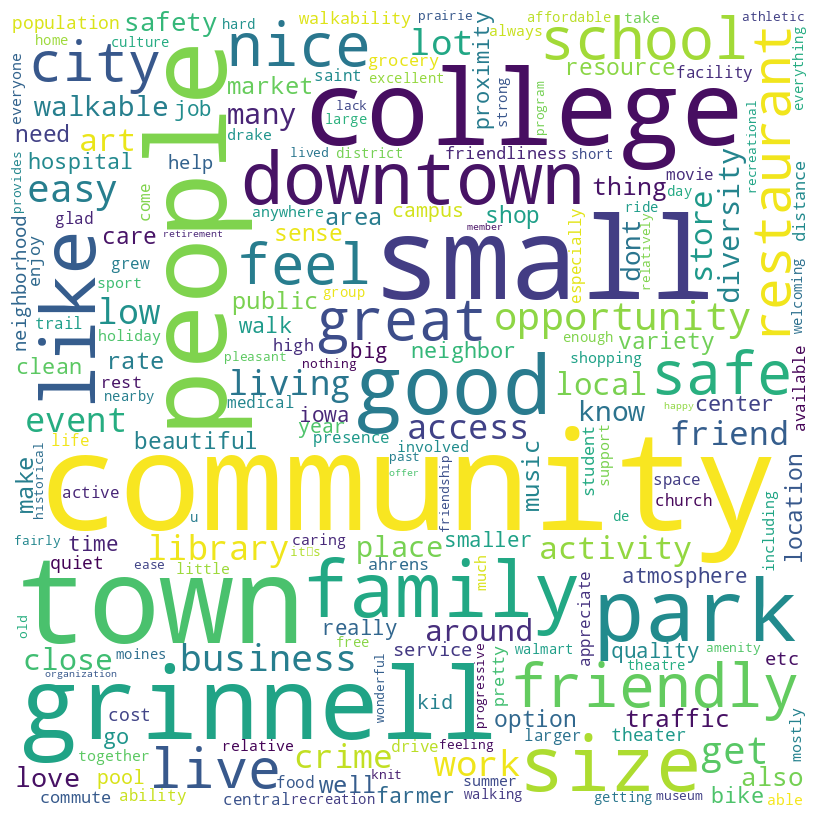

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


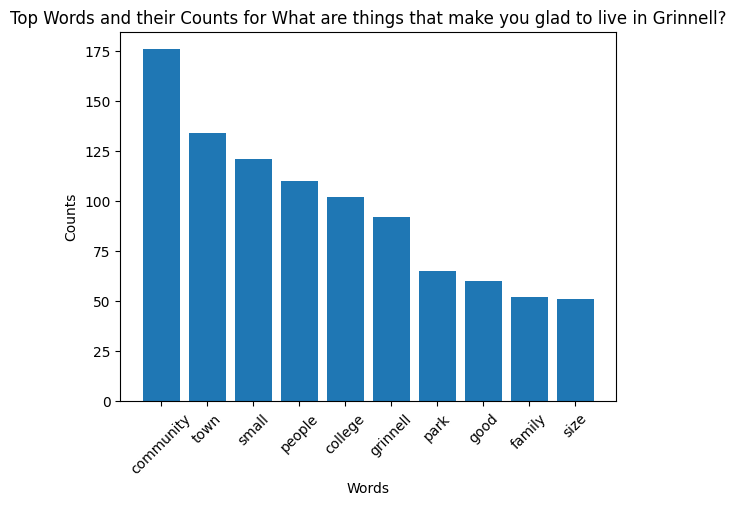

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 words and their counts
top_words = word_counts.most_common(10)
words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

# Create a bar plot of the top words and their counts
plt.bar(words, counts)
plt.title('Top Words and their Counts for What are things that make you glad to live in Grinnell?')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.show()


### Words before and after a particular word

Select the word "community" and Use Ctrl+Shift+L to change every occurence of the specified word to repeat this analysis on a different word. Rerun the block after that

Words before 'community':  ['grinnell', 'college', 'believe', 'college', 'town', 'generates', 'energy', 'expectation', 'found', 'small', 'midwestern', 'dont', 'live', 'work', 'friendly', 'people', 'grinnell', 'area', 'art', 'council', 'good', 'public', 'school', 'system', 'pleasant', 'well', 'maintained', 'public', 'park', 'bicycle', 'trail', 'well', 'maintained', 'downtown', 'saint', 'rest', 'coffeehouse', 'mcnallys', 'solera', 'grinnell', 'craft', 'brewhouse', 'bike', 'ace', 'hardware', 'grinnell', 'college', 'prairie', 'canary', 'music', 'park', 'grinnell', 'regional', 'medical', 'center', 'responsible', 'employer', 'connectedness', 'close', 'knit', 'family', 'workparticularly', 'student', 'vibrant', 'diversity', 'student', 'come', 'world', 'small', 'town', 'vibe', 'fairly', 'active', 'size', 'size', 'smaller', 'close', 'opportunity', 'kiddos', 'participate', 'various', 'activity', 'sense', 'beautiful', 'park', 'drake', 'library', 'college', 'beautiful', 'downtown', 'smaller', 'tigh

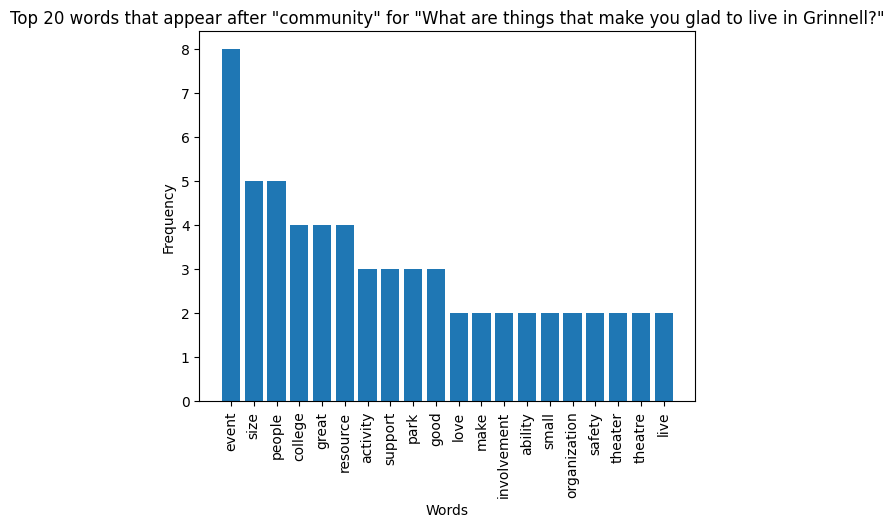

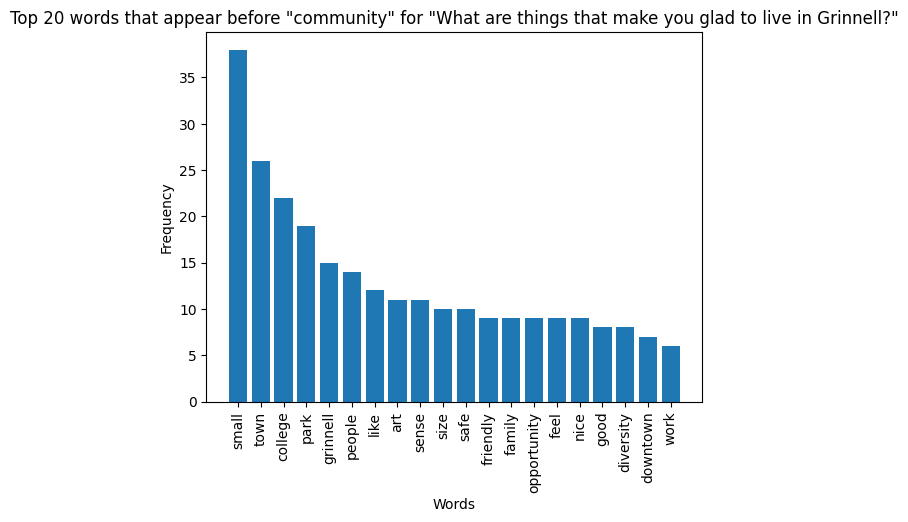

In [ ]:
# community of what... finding words that are before and after the word "community" in the responses where community appears

#finding a subset of responses in Q1 where the word community appears.

# Initialize an empty list to store the subset of records
subset = []

# Initialize empty lists to store the words before and after "community"
before_community = []
after_community = []

# Loop over each record in the column
for record in records:
    # Split the record into individual words and remove punctuation
    words = word_tokenize(record.lower().translate(str.maketrans('', '', string.punctuation)))
    
    # Remove stop words from the list of words
    words = [word for word in words if word not in stop_words]
    
    # Spell check each word and replace any misspelled words with the original word
    words = [word if word in vocab else word.lower() for word in words]

    #lemmatizing
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Check if the word "community" appears in the list of words
    if "community" in words:
        # If so, add the record to the subset list
        subset.append(record)
    
# Check if the words "community" appear in the list of words
    if "community" in words:
        # If so, find the index of the first occurrence of "community"
        idx = words.index("community") if "community" in words else words.index("community")
        
        # Add the words before "community" to the before_community list
        before_community.extend(words[:idx])
        
        # Add the first word after "community" to the after_community list
        if idx < len(words) - 1:
            after_community.append(words[idx+1])
        
# Print the lists of words before and after "community" 
print("Words before 'community': ", before_community)
print("Words after 'community': ", after_community)

# Get the counts of each word that appears AFTER "community"
word_counts = Counter(after_community)

# Get the top 10 most frequent words
top_words = dict(word_counts.most_common(20))

# Create a bar chart of the top 10 most frequent words
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 words that appear after "community" for "What are things that make you glad to live in Grinnell?"')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Get the counts of each word that appears BEFORE "community"
word_counts = Counter(before_community)

# Get the top 10 most frequent words
top_words = dict(word_counts.most_common(20))

# Create a bar chart of the top 10 most frequent words
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 words that appear before "community" for "What are things that make you glad to live in Grinnell?"')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Looking at 2 words after a word for the respondent that use the word "community" in the question - Select the word "community" and Use Ctrl+Shift+L to change every occurence of the specified word to repeat this analysis on a different word. Rerun the block after that

In [ ]:
# Initialize an empty list to store the subset of records
combinations = []

# Loop over each record in the column
for i, record in enumerate(records):
    # Split the record into individual words and remove punctuation
    words = word_tokenize(record.lower().translate(str.maketrans('', '', string.punctuation)))
    
    # Remove stop words from the list of words
    words = [word for word in words if word not in stop_words]
    
    # Spell check each word and replace any misspelled words with the original word
    words = [word if word in vocab else word.lower() for word in words]

    #lemmatizing
    words = [lemmatizer.lemmatize(word) for word in words]
    
        # Check if the word "community" appears in the list of words
    if "community" in words:
        # Find the index of the word "community" in the list of words
        index = words.index("community")
        
        # Check if there are at least two words after the word "community"
        if len(words) > index+2:
            # If so, add the two words following "community" to the combinations list
            combinations.append((responses.loc[i, 'Random Number'], words[index+1], words[index+2]))
        
# Print the lists of words before and after "community"
print(combinations)

df = pd.DataFrame(combinations, columns=['response/random number index', 'word1_aftercommunity', 'word2_aftercommunity'])

# save the DataFrame as an Excel file
df.to_excel('aftercommunity.xlsx', index=False)

[('1', 'proximity', 'de'), ('4', 'love', 'esthetic'), ('5', 'partner', 'grinnell'), ('6', 'size', 'small'), ('10', 'event', 'like'), ('11', 'prestige', 'college'), ('12', 'perfect', 'size'), ('15', 'many', 'varied'), ('18', 'free', 'event'), ('20', 'business', 'pleasure'), ('22', 'big', 'enough'), ('26', 'make', 'easy'), ('28', 'safer', 'big'), ('29', 'working', 'together'), ('35', 'pride', 'engagement'), ('38', 'sense', 'safetysecurity'), ('40', 'spirit', 'recognizing'), ('43', 'college', 'community'), ('51', 'activity', 'active'), ('52', 'ability', 'town'), ('59', 'group', 'restaurant'), ('60', 'support', 'well'), ('61', 'active', 'art'), ('63', 'small', 'town'), ('74', 'college', 'friendliness'), ('78', 'great', 'recreation'), ('79', 'activity', 'large'), ('87', 'fact', 'progressive'), ('89', 'great', 'park'), ('97', 'road', 'store'), ('100', 'clean', 'downtown'), ('104', 'friend', 'opportunity'), ('106', 'beautiful', 'downtown'), ('109', 'great', 'people'), ('114', 'band', 'good'),

### Conducting sentimental analysis on Question 1: What are things that make you glad to live in Grinnell?

The number of positive statements is 428
The number of negative statements is 46
The number of neutral statements is 37
1497
Rows in positive category:  [2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 61, 62, 63, 64, 65, 67, 68, 70, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 89, 90, 93, 95, 96, 97, 98, 100, 101, 103, 105, 107, 108, 110, 111, 113, 115, 117, 118, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 135, 136, 137, 139, 140, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 156, 158, 159, 160, 161, 162, 164, 166, 167, 168, 169, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 190, 191, 193, 194, 195, 197, 198, 199, 201, 202, 203, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 218, 219, 221, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 24

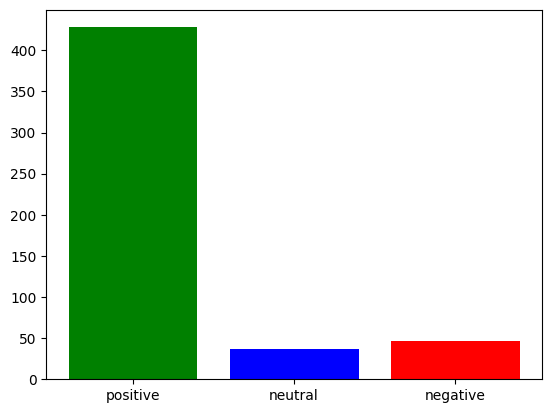

In [ ]:
positive_count = 0
negative_count = 0
neutral_count = 0
x = [0] * 1000 

positive_rows_q1 = []
neutral_rows_q1 = []
negative_rows_q1 = []

for i in range(responses.shape[0]):
    # CHANGE THE 1 IN THE LINE BELOW TO A DIFFERENT NUMBER TO REPEAT ANALYSIS ON A DIFFERENT QUESTION. 1 represents question 1. 
    if isinstance(responses.iloc[i][1], str):
        # CHANGE THE 1 IN THE LINE BELOW TO A DIFFERENT NUMBER TO REPEAT ANALYSIS ON A DIFFERENT QUESTION. 1 represents question 1. 
        temp = sentiment_pipeline(responses.iloc[i][1])[0]
        label = temp['label']
        score = temp['score']
        if score <= 0.95:
          temp['label'] = 'NEUTRAL'
          neutral_count += 1
          x[i] = score
          neutral_rows_q1.append(i)
        elif label == 'POSITIVE':
          positive_count += 1
          x[i] = score
          positive_rows_q1.append(i)
        elif label == 'NEGATIVE':
          negative_count += 1
          x[i] = -1 * score
          negative_rows_q1.append(i)


print("The number of positive statements is {}".format(positive_count))
print("The number of negative statements is {}".format(negative_count))
print("The number of neutral statements is {}".format(neutral_count))
print(responses.shape[0])
# print out the rows in each category
print("Rows in positive category: ", positive_rows_q1)
print("Rows in neutral category: ", neutral_rows_q1)
print("Rows in negative category: ", negative_rows_q1)

# plot out the number of positive and negative responses
sentiment_data = [positive_count, neutral_count, negative_count]

# define the categories
categories = ['positive', 'neutral', 'negative']
plt.bar(range(len(sentiment_data)), sentiment_data, color = ['g', 'b', 'r'])

# set the x-axis labels to be the categories
plt.xticks(range(len(sentiment_data)), categories)
plt.show()